In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('dataframe.csv')
df = df.set_index("Unnamed: 0")
df.head()

,Text,Label
Unnamed: 0,,
0,Musk Foils Tesla Claim It’s Handled Covid-19 L...,Real
1,Why New York Suffered When Other Cities Were S...,Real
2,Scientists Question Study Linking Malaria Drug...,Real
3,Counting Covid-19 Deaths,Real
4,Instacart Shoppers During Covid-19,Real


In [34]:
df

,Text,Label
Unnamed: 0,,
0,Musk Foils Tesla Claim It’s Handled Covid-19 L...,Real
1,Why New York Suffered When Other Cities Were S...,Real
2,Scientists Question Study Linking Malaria Drug...,Real
3,Counting Covid-19 Deaths,Real
4,Instacart Shoppers During Covid-19,Real
...,...,...
1478,Recommended Reading: He bought StubHub right b...,Real
1479,Sling TV president replaced as subscriber numb...,Real
1480,Supercomputers across Europe have fallen to cr...,Real


In [3]:
#Let's look at the shape of our dataframe 
df.shape

(1983, 2)

In [4]:
#Let's take a look at our Label values 
df.Label.value_counts()
#Almost 50/50

Real    1000
Fake     983
Name: Label, dtype: int64

In [5]:
# Let's set up our y 
y = df.Label

# Drop the label coloumn from our dataframe 
df.drop("Label", axis=1)

# Now let's make our training and test set 
X_train, X_test, y_train, y_test = train_test_split(df["Text"], y, test_size=0.33, random_state=42)

In [6]:
# 101 Level reminder that text data is not organized as a matrix of a vector of real numbers
# To turn this text data into it's numerical represenation we will need TFIDF and Countvectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [7]:
# Now let's initialize our respective vectorizers
tfidf = TfidfVectorizer(stop_words='english', max_df=.8)
cvec = CountVectorizer(stop_words='english', max_df=.8)

# Fit and transform our training data 
tfidf_x_train = tfidf.fit_transform(X_train)
cvec_x_train = cvec.fit_transform(X_train)

# JUST tranform the test data 
tfidf_x_test = tfidf.transform(X_test)
cvec_x_test = cvec.transform(X_test)

In [8]:
print(tfidf.get_feature_names()[-10:])
print(cvec.get_feature_names()[-10:])

['youtuber', 'zambia', 'zealand', 'zero', 'zika', 'zinc', 'zookeepers', 'zoom', 'zoombombing', 'zyphr']
['youtuber', 'zambia', 'zealand', 'zero', 'zika', 'zinc', 'zookeepers', 'zoom', 'zoombombing', 'zyphr']


In [9]:
#Let's now look at these two matrices as dataframes 
cvec_df = pd.DataFrame(cvec_x_train.A, columns=cvec.get_feature_names())
tfidf_df = pd.DataFrame(tfidf_x_train.A, columns=tfidf.get_feature_names())

In [10]:
cvec_df.head()

,000,01,03,04,08,10,100,100k,102,11,...,youtuber,zambia,zealand,zero,zika,zinc,zookeepers,zoom,zoombombing,zyphr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
tfidf_df.head()

,000,01,03,04,08,10,100,100k,102,11,...,youtuber,zambia,zealand,zero,zika,zinc,zookeepers,zoom,zoombombing,zyphr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np
import itertools

In [14]:
m_nb = MultinomialNB()

accuracy: 0.876
Confusion matrix, without normalization


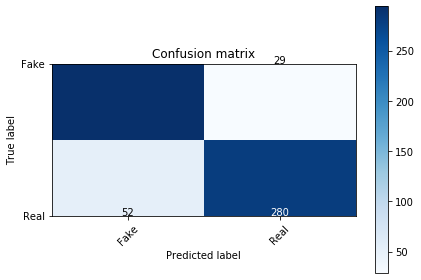

In [15]:
m_nb.fit(tfidf_x_train, y_train)
pred = m_nb.predict(tfidf_x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Fake','Real'])
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

Confusion matrix, without normalization


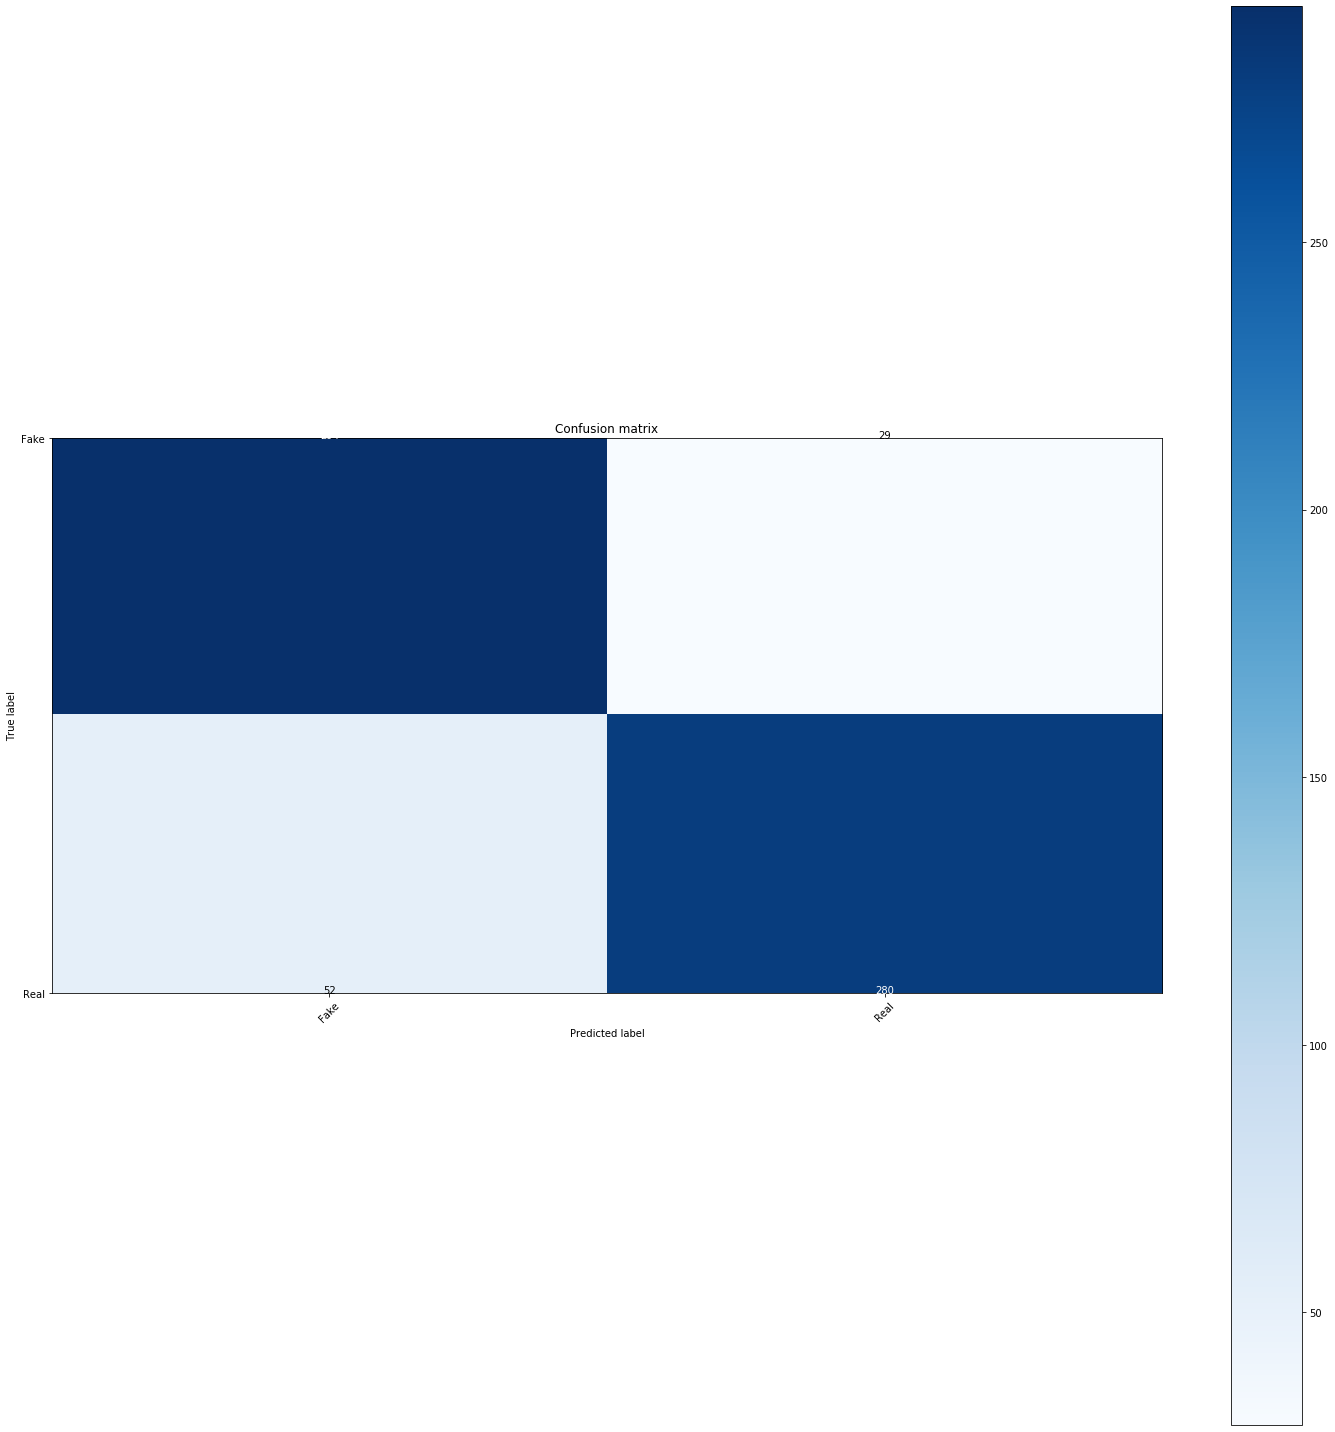

In [16]:
fig, ax = plt.subplots(figsize=(20,20))
plot_confusion_matrix(cm, classes=['Fake','Real'])

In [17]:
print(cm)

[[294  29]
 [ 52 280]]


In [18]:
cm = pd.DataFrame(cm, columns=['Predicted Fake','Predicted Real'], index=['Actually Fake','Actually Real'])
cm

,Predicted Fake,Predicted Real
Actually Fake,294,29
Actually Real,52,280


In [19]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        Fake       0.85      0.91      0.88       323
        Real       0.91      0.84      0.87       332

    accuracy                           0.88       655
   macro avg       0.88      0.88      0.88       655
weighted avg       0.88      0.88      0.88       655



In [20]:
import shap

# XG Boost 

In [36]:
xgb_pipe = Pipeline([
    ('cvec', TfidfVectorizer(analyzer='word',
                             stop_words='english',
                             tokenizer=rt.tokenize,
                             lowercase=False,
                             max_features=1000)),
    ('xgb', XGBClassifier())
])

NameError: name 'Pipeline' is not defined

In [35]:
xgb = XGBClassifier()
xgb.fit(tfidf_x_train, y_train)
score = xgb.score(y_test, pred)

TypeError: can not initialize DMatrix from Series

In [ ]:
classifier.fit(X_train, y_train)
preds = classifier.predict(X_test)

In [ ]:
m_nb.fit(tfidf_x_train, y_train)
pred = m_nb.predict(tfidf_x_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy: %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Fake','Real'])
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [ ]:
explainer = shap.TreeExplainer(my_model)

In [ ]:
explainer = shap.TreeExplainer(my_model) 
shap_values = explainer.shap_values(val_X) 
shap.summary_plot(shap_values[1], val_X)

# EDA

In [21]:
cvec_uni = CountVectorizer(stop_words = 'english', ngram_range = (1,1))
cvec_bi = CountVectorizer(stop_words='english', ngram_range=(2,2))

In [22]:
headline_cvec_uni = cvec_uni.fit_transform(df['Text'])
df_headline_uni = pd.DataFrame(headline_cvec_uni.toarray(), columns=cvec_uni.get_feature_names())
df_headline_uni.head()

,000,01,03,04,06,08,10,100,100k,102,...,youtuber,zambia,zealand,zero,zika,zinc,zookeepers,zoom,zoombombing,zyphr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


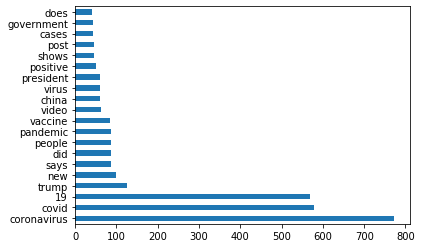

In [23]:
df_headline_uni.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')

In [24]:
headline_cvec_bi = cvec_bi.fit_transform(df['Text'])
df_headline_bi = pd.DataFrame(headline_cvec_bi.toarray(), columns=cvec_bi.get_feature_names())
df_headline_bi.head()

,000 adults,000 allowance,000 confirmed,000 contract,000 coronavirus,000 covid,000 dead,000 deaths,000 die,000 employees,...,zero lockdown,zero man,zika 2016,zinc cure,zinc prevent,zookeepers coronavirus,zoom latest,zoom video,zoom way,zoombombing arrive
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


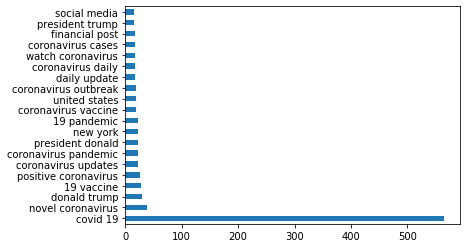

In [25]:
df_headline_bi.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')

In [29]:
cvec_uni_2 = CountVectorizer(stop_words = 'english', ngram_range = (1,1), max_df=.50)
cvec_bi_2 = CountVectorizer(stop_words='english', ngram_range=(2,2), max_df=.50)

In [30]:
headline_cvec_uni_2 = cvec_uni_2.fit_transform(df["Text"])
df_headline_uni_2 = pd.DataFrame(headline_cvec_uni.toarray(), columns=cvec_uni_2.get_feature_names())
df_headline_uni_2.head()

,000,01,03,04,06,08,10,100,100k,102,...,youtuber,zambia,zealand,zero,zika,zinc,zookeepers,zoom,zoombombing,zyphr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


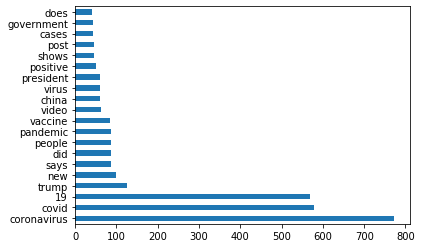

In [31]:
df_headline_uni_2.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')

In [ ]:
print(X_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)

In [ ]:
rf.fit(X_train, y_train)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le_X_train = le.fit_transform(X_train)
le_y_train = le.fit_transform(y_train)

In [ ]:
rf.fit(le_X_train, le_y_train)

In [ ]:
import wordcloud